<a href="https://colab.research.google.com/github/claitonp/tech-challenge/blob/main/tech_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech Challenge - Fase 1

- Modelo preditivo de custos em plano de saúde

O conjunto de dados de seguro médico abrange vários fatores que influenciam as despesas médicas, como idade, sexo, IMC, tabagismo, número de filhos e região. Este conjunto de dados serve de base para o treinamento de modelos de aprendizado de máquina capazes de prever despesas médicas para novos segurados.

# Itens abordados:

* 1 - Análise exploratória dos dados
* 2 - Regressao linear simples
* 3 - Modelo baseado em árvore (DecisionTreeRegressor)
* 4 - Modelo baseado em árvore (RandomForestRegressor)
* 5 - Usando StandardScaler no modelo RandomForestRegressor




# Atributos:

- **age**: idade

- **sex**: Sexo

- **bmi**: indice de massa corporal

- **children**: número de filhos

- **smoker**: fumante

- **region**: região

- **charges**: gasto com o plano de saúde

# 1 - Análise exploratória dos dados

In [2]:
import pandas as pd

import seaborn as sb

Necessário fazer o upload .csv

In [4]:
dados = pd.read_csv("medical_insurance.csv")

A planilha foi obtida do kaggle.com https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction?resource=download

In [33]:
dados.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [7]:
dados.shape

(2772, 7)

In [8]:
dados.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
dados.describe()


,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
dados.groupby('sex').describe()

age                                                         bmi  \
         count       mean        std   min   25%   50%   75%   max   count   
sex                                                                          
female  1366.0  39.481698  14.093176  18.0  27.0  40.0  52.0  64.0  1366.0   
male    1406.0  38.748222  14.065654  18.0  26.0  39.0  51.0  64.0  1406.0   

                   ... children      charges                              \
             mean  ...      75%  max   count          mean           std   
sex                ...                                                     
female  30.434473  ...      2.0  5.0  1366.0  12486.831977  11049.445434   
male    30.960633  ...      2.0  5.0  1406.0  14013.872721  13094.571070   

                                                                      
              min          25%        50%           75%          max  
sex                                                                   
female  1607.5101  4804.400100  9283.5620  14418.154925  63770.42801  
male    1121.8739  4523.184438  9361.3268  19160.177000  62592.87309  

[2 rows x 32 columns]

In [20]:
dados.groupby('smoker').describe()

age                                                         bmi  \
         count       mean        std   min   25%   50%   75%   max   count   
smoker                                                                       
no      2208.0  39.275362  14.114949  18.0  26.0  39.0  52.0  64.0  2208.0   
yes      564.0  38.460993  13.943055  18.0  27.0  37.5  49.0  64.0   564.0   

                   ... children      charges                              \
             mean  ...      75%  max   count          mean           std   
smoker             ...                                                     
no      30.665765  ...      2.0  5.0  2208.0   8417.874411   6015.568209   
yes     30.840656  ...      2.0  5.0   564.0  32223.139764  11521.258969   

                                                                         
               min           25%         50%           75%          max  
smoker                                                                   
no       1121.8739   3953.906862   7341.4160  11354.085925  36910.60803  
yes     12829.4551  20984.093600  34725.8811  41097.161750  63770.42801  

[2 rows x 32 columns]

In [12]:
dados.groupby('region').describe()

age                                                         bmi  \
           count       mean        std   min   25%   50%    75%   max  count   
region                                                                         
northeast  658.0  39.243161  14.005929  18.0  27.0  39.0  51.00  64.0  658.0   
northwest  664.0  39.081325  14.092862  19.0  26.0  39.0  51.25  64.0  664.0   
southeast  766.0  38.762402  14.273095  18.0  26.0  39.0  51.00  64.0  766.0   
southwest  684.0  39.397661  13.948653  19.0  27.0  39.0  51.00  64.0  684.0   

                      ... children      charges                              \
                mean  ...      75%  max   count          mean           std   
region                ...                                                     
northeast  29.157781  ...      2.0  5.0   658.0  13475.874737  11310.618603   
northwest  29.147259  ...      2.0  5.0   664.0  12463.129315  10996.174365   
southeast  33.478773  ...      2.0  5.0   766.0  14748.777706  14138.464968   
southwest  30.584503  ...      2.0  5.0   684.0  12164.196435  11419.830441   

                                                                           
                 min          25%          50%           75%          max  
region                                                                     
northeast  1694.7964  5209.578850  10072.05505  16776.304050  58571.07448  
northwest  1621.3402  4733.635288   9081.14720  15153.617225  60021.39897  
southeast  1121.8739  4349.725100   9140.95100  19534.924300  63770.42801  
southwest  1241.5650  4746.344000   8790.53100  13390.559000  52590.82939  

[4 rows x 32 columns]

In [21]:
dados.groupby('children').describe()

age                                                          bmi  \
           count       mean        std   min    25%   50%   75%   max   count   
children                                                                        
0         1186.0  38.431703  16.433550  18.0  22.00  36.0  55.0  64.0  1186.0   
1          672.0  39.300595  12.128551  18.0  30.00  40.0  49.0  64.0   672.0   
2          496.0  39.286290  11.776826  18.0  29.75  40.0  48.0  64.0   496.0   
3          324.0  41.395062  12.238779  18.0  31.00  41.0  52.0  64.0   324.0   
4           52.0  38.769231  11.833179  18.0  29.00  38.0  48.0  61.0    52.0   
5           42.0  35.904762   9.672212  19.0  28.00  39.0  43.0  52.0    42.0   

                     ...                charges                              \
               mean  ...     75%    max   count          mean           std   
children             ...                                                      
0         30.628508  ...  34.865  53.13  1186.0  12317.920881  11983.528943   
1         30.705744  ...  34.385  52.58   672.0  12722.650521  11859.598348   
2         31.035806  ...  35.555  48.07   496.0  15268.182723  13163.847347   
3         30.580000  ...  34.320  46.53   324.0  15304.070620  12283.730097   
4         31.314615  ...  33.660  41.47    52.0  13550.983876   8994.512465   
5         28.915000  ...  31.900  46.75    42.0   8706.036629   3549.240196   

                                                                          
                min          25%          50%           75%          max  
children                                                                  
0         1121.8739  2727.395100   9850.43200  14394.557900  63770.42801  
1         1711.0268  4776.207225   8483.87015  15632.052050  58571.07448  
2         2304.0022  6169.665100   9264.97915  21138.760025  49577.66240  
3         3443.0640  6652.528800  10580.52000  19199.944000  60021.39897  
4         4504.6624  7243.813600  11024.41820  17128.426080  40182.24600  
5         4687.7970  5615.369000   8596.82780  10096.970000  19023.26000  

[6 rows x 24 columns]

<Axes: xlabel='age', ylabel='Count'>

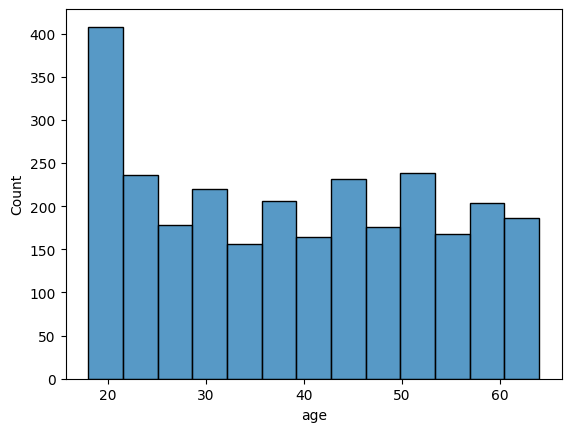

In [14]:
sb.histplot(data=dados, x="age")

<Axes: xlabel='children', ylabel='Count'>

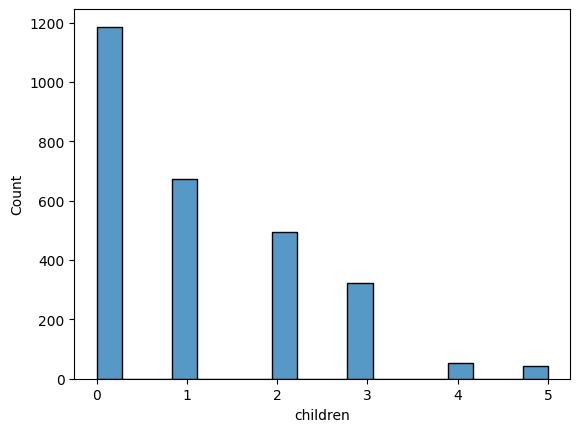

In [15]:
sb.histplot(data=dados, x="children")

<Axes: xlabel='bmi', ylabel='Count'>

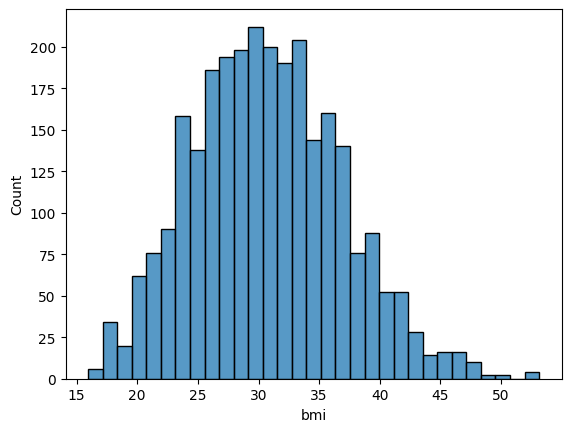

In [22]:
sb.histplot(data=dados, x="bmi")

<ipython-input-23-f53d60a028e2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='age', y='charges', data=dados, palette='hls')


<Axes: xlabel='age', ylabel='charges'>

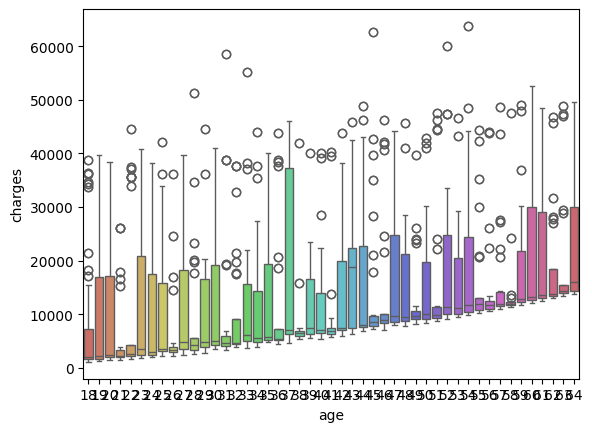

In [23]:
sb.boxplot(x='age', y='charges', data=dados, palette='hls')

Pode ser observado nesse gráfico, a relação da idade e dos gastos, que com o avanço da idade os gastos vão aumentando....

<ipython-input-24-63abe1d98588>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='smoker', y='charges', data=dados, palette='hls')


<Axes: xlabel='smoker', ylabel='charges'>

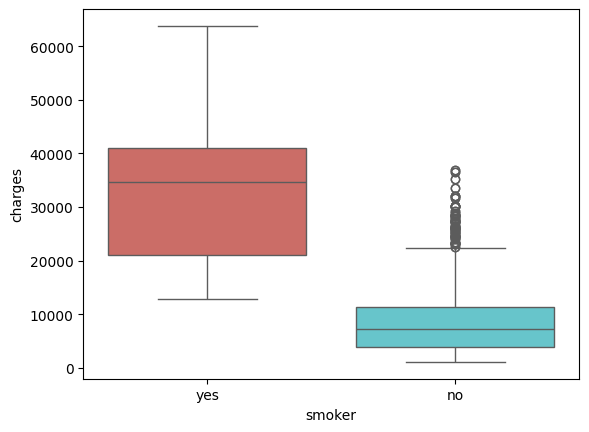

In [24]:
sb.boxplot(x='smoker', y='charges', data=dados, palette='hls')

Nesse gráfico pode ser observado que o fumante tem um gasto maior, em relação ao não fumante.

<ipython-input-25-cce2b2571798>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='sex', y='charges', data=dados, palette='hls')


<Axes: xlabel='sex', ylabel='charges'>

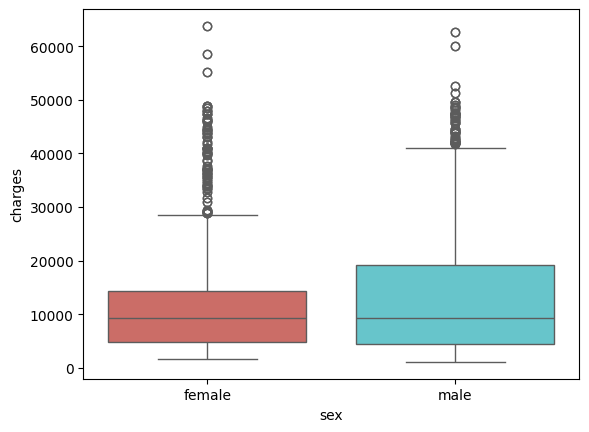

In [25]:
sb.boxplot(x='sex', y='charges', data=dados, palette='hls')

<Axes: xlabel='charges'>

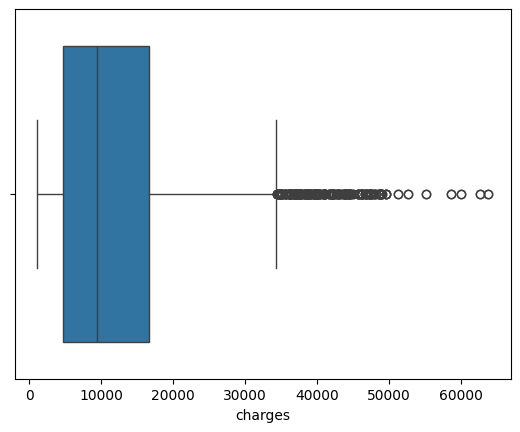

In [26]:
sb.boxplot(x=dados["charges"])

<Axes: xlabel='bmi'>

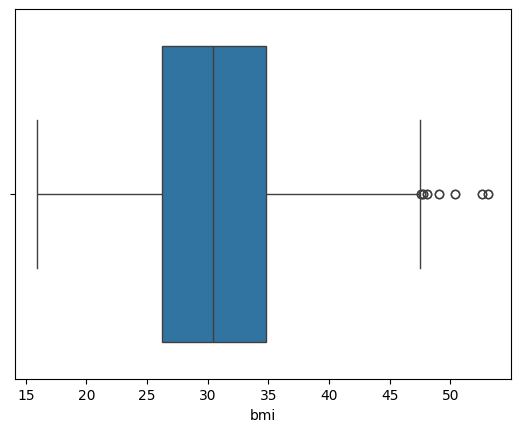

In [27]:
sb.boxplot(x=dados["bmi"])

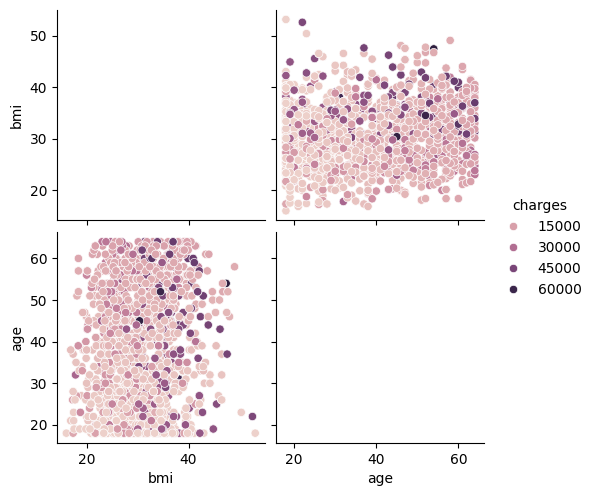

In [28]:
sb.pairplot(dados,vars=['bmi','age'],hue="charges")

Nesses gráficos, pode ser observar que quanto maior o bmi (indice de massa corportal) maior o gasto com o plano de saúde, o mesmo com  avanço da idade.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 83.3% of the points cannot be plac

[Text(13.000000000000002, 0.5, '')]

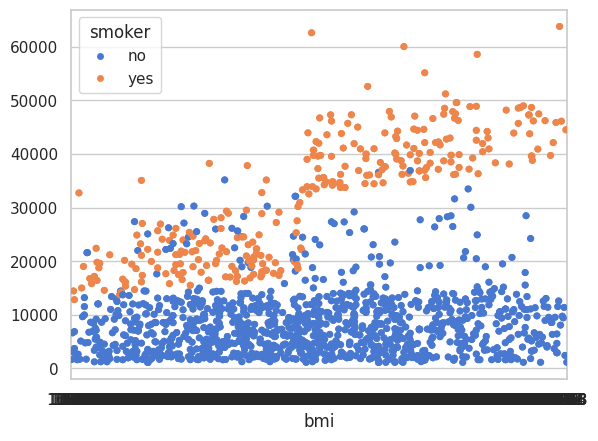

In [29]:

sb.set_theme(style="whitegrid", palette="muted")

ax = sb.swarmplot(data=dados, x="bmi", y="charges", hue="smoker")
ax.set(ylabel="")

Aqui neste gráfico (smoker,bmi e charges), pode perceber que fumantes tem mais gastos com o plano de saude e quanto mais alto IMC o gasto vai aumentando


- LabelEncoder

Vamos utilizar label enconder para tratar variáveis categoricas que possuem apenas dois tipos de categorias, como genero, especialização e status.

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
colunas=['sex','smoker','region']

label_encoder = LabelEncoder()
for col in colunas:
    dados[col] = label_encoder.fit_transform(dados[col])
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


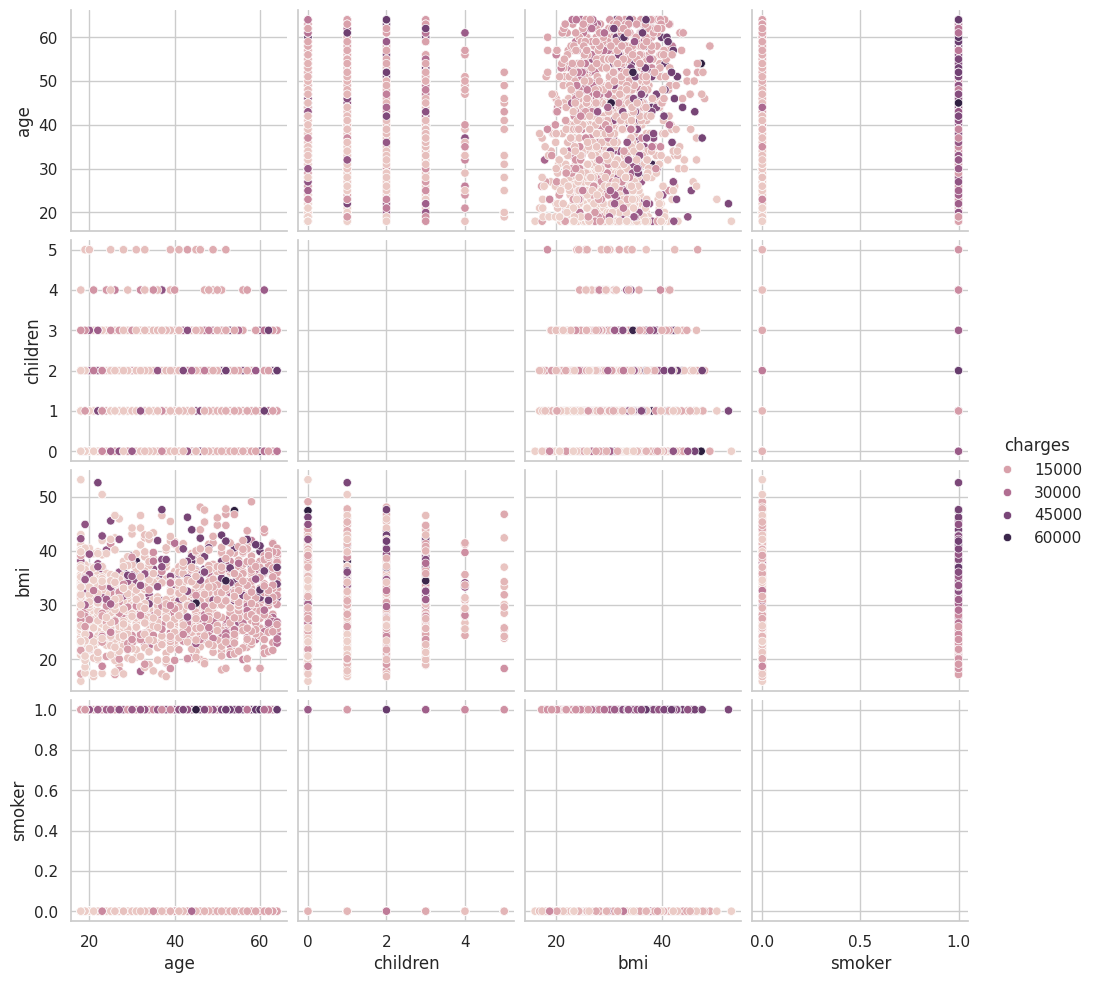

In [32]:
sb.pairplot(dados,vars=['age','children','bmi','smoker'],hue="charges")

<Axes: >

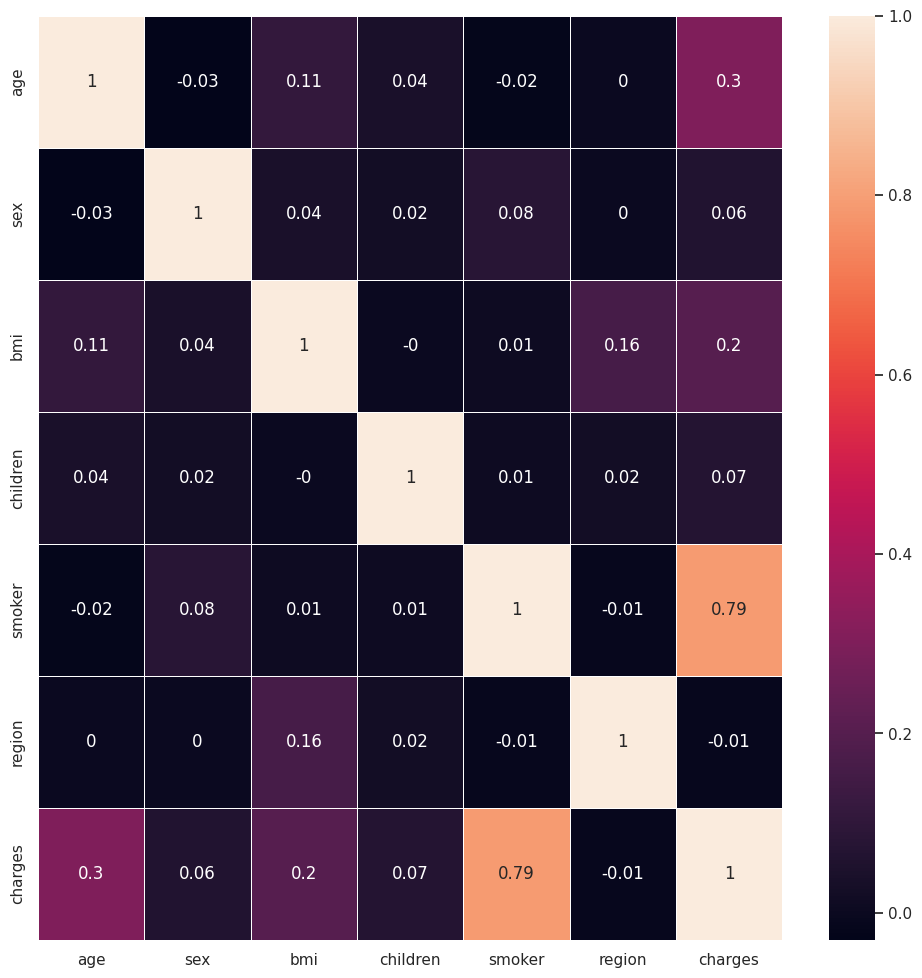

In [34]:
import matplotlib.pyplot as plt

correlation_matrix = dados.corr().round(2)
fig, ax = plt.subplots(figsize=(12,12))
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

pode ser percebido que a correlação dos gastos com a pessoa fumante é alta de 0,79 e com bmi de 0,20 e de idade 0,3

In [35]:

correlation_matrix = dados.corr()
max_corr = correlation_matrix.stack().sort_values(ascending=False).drop_duplicates()
max_corr = max_corr[max_corr < 1].head(10)

print("Maior correlação:")
print(max_corr)

Maior correlação:
smoker    charges     0.788783
charges   age         0.298624
bmi       charges     0.199846
region    bmi         0.159178
bmi       age         0.113048
sex       smoker      0.082326
charges   children    0.066442
sex       charges     0.062837
bmi       sex         0.042924
children  age         0.037574
dtype: float64


# 2 - Regressao linear simples - - - - - - - - - - - - - - - - - - -


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [37]:
# Selecionando as features e o target
X = dados[['age', 'bmi', 'sex', 'smoker', 'region', 'children']]
y = dados['charges']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando um modelo de regressão linear
model = LinearRegression()

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões nos dados de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)

erro_absoluto_medio = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
print("R-squared:", r2)

Mean Squared Error: 39922479.35435013
Erro Absoluto Médio: 4167.301435974504
R-squared: 0.7398864322395977


**Resultado**

Em resumo, o modelo **LinearRegression** parece ter um desempenho melhor do que a regressão linear, explicando cerca de **73,98%** da variabilidade nos custos médicos com base nas variáveis incluídas.

MSE alto ? Não entendi

In [38]:
print(X_test.shape)
print(y_test.shape)
print(y_pred.shape)

(555, 6)
(555,)
(555,)


In [39]:
import matplotlib.pyplot as plt

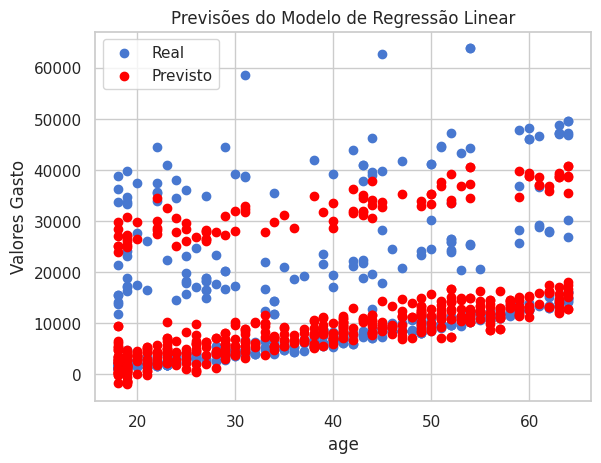

In [40]:
# Visualizando as previsões

feature = 'age'

plt.scatter(X_test[feature], y_test, label='Real')
plt.scatter(X_test[feature], y_pred, label='Previsto', color='red')
plt.xlabel(feature)
plt.ylabel('Valores Gasto')
plt.title('Previsões do Modelo de Regressão Linear')
plt.legend()
plt.show()

# 3 - Modelo baseado em árvore (DecisionTreeRegressor) - - - - - - - - - - - -



In [42]:
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz

<Axes: >

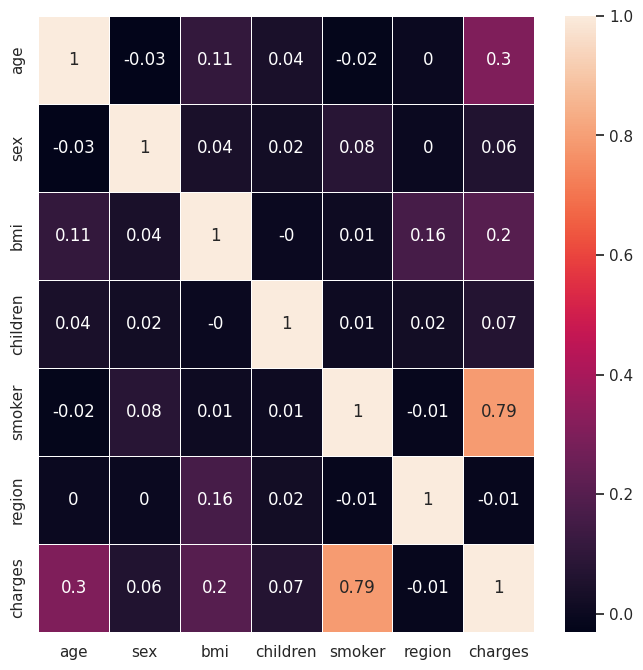

In [43]:
correlation_matrix = dados.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)


In [44]:
# Selecionando as features e o target
X = dados[['age', 'bmi', 'sex', 'smoker', 'region', 'children']]
y = dados['charges']

In [45]:
X

,age,bmi,sex,smoker,region,children
0,19,27.900,0,1,3,0
1,18,33.770,1,0,2,1
2,28,33.000,1,0,2,3
3,33,22.705,1,0,1,0
4,32,28.880,1,0,1,0
...,...,...,...,...,...,...
2767,47,45.320,0,0,2,1
2768,21,34.600,0,0,3,0
2769,19,26.030,1,1,1,1
2770,23,18.715,1,0,1,0


In [46]:
#Separando em bases de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_predito = dt.predict(X_test)

In [48]:
y_predito = dt.predict(X_test)

In [49]:
# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_predito)

erro_absoluto_medio = mean_absolute_error(y_test, y_predito)
r2 = r2_score(y_test, y_predito)

print("Mean Squared Error:", mse)
print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
print("R-squared:", r2)

Mean Squared Error: 11040491.541405443
Erro Absoluto Médio: 705.3936597297297
R-squared: 0.9280660497266788


**Resultado**

o modelo **DecisionTreeRegressor** parece ter um desempenho melhor do que a regressão linear, explicando cerca de **92,80%** da variabilidade nos custos médicos com base nas variáveis incluídas.

In [51]:
print (dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.9997587266398212
0.9280660497266788


O **score** nos dá uma visão da precisão média da floresta aleatória nos dados fornecidos

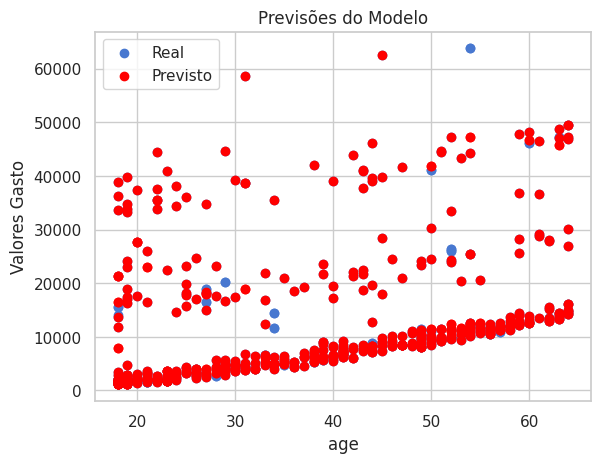

In [61]:
# Visualizando as previsões

feature = 'age'

plt.scatter(X_test[feature], y_test, label='Real')
plt.scatter(X_test[feature], y_predito, label='Previsto', color='red')
plt.xlabel(feature)
plt.ylabel('Valores Gasto')
plt.title('Previsões do Modelo')
plt.legend()
plt.show()

# 4 - Modelo baseado em árvore (RandomForestRegressor) - - - - - - - - - - - - - -

In [53]:
rf = RandomForestRegressor()

In [54]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
estimator = rf.estimators_

In [55]:
y_predito_random_forest = rf.predict(X_test)

In [56]:
# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_predito_random_forest)

erro_absoluto_medio = mean_absolute_error(y_test, y_predito_random_forest)
r2 = r2_score(y_test, y_predito_random_forest)

print("Mean Squared Error:", mse)
print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
print("R-squared:", r2)

Mean Squared Error: 7605458.102724574
Erro Absoluto Médio: 1313.077350075928
R-squared: 0.9504468942423941


**Resultado**

O modelo **RandomForestRegressor** parece ter um desempenho melhor do que a regressão linear e DecisionTreeRegressor, explicando cerca de **95,04%** da variabilidade nos custos médicos com base nas variáveis incluídas.

In [57]:
print (rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9922019026672506
0.9504468942423941


O **score** nos dá uma visão da precisão média da floresta aleatória nos dados fornecidos

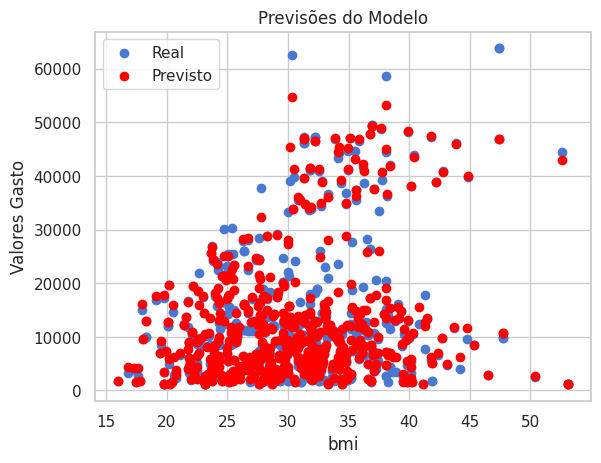

In [66]:
# Visualizando as previsões

feature = 'bmi'

plt.scatter(X_test[feature], y_test, label='Real')
plt.scatter(X_test[feature], y_predito_random_forest, label='Previsto', color='red')
plt.xlabel(feature)
plt.ylabel('Valores Gasto')
plt.title('Previsões do Modelo')
plt.legend()
plt.show()

# 5 - Usando StandardScaler - RandomForestRegressor - - - - - - -

In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler() #chamando o metodo de padronização dos dados (média e std)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [64]:
y_predito_random_forest_scaled = rf.predict(X_test_scaled)

In [65]:
# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_predito_random_forest_scaled)

erro_absoluto_medio = mean_absolute_error(y_test, y_predito_random_forest_scaled)
r2 = r2_score(y_test, y_predito_random_forest_scaled)

print("Mean Squared Error:", mse)
print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
print("R-squared:", r2)

Mean Squared Error: 7713185.584377478
Erro Absoluto Médio: 1322.2617200532604
R-squared: 0.9497449994690293


Não há melhoras no modelo, usando StandardScaler